In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

years_list = [2010, 2011, 2012, 2013, 2014]

from params import states_list

In [2]:
# Import uncleaned state pop data

unclean_state_pop = pd.read_excel('Resources/nst-est2019-01.xlsx')

# clean state population into clean dataframe

state_pop = unclean_state_pop.dropna()
state_pop = state_pop.rename(columns = {'table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)':'State',
                                 'Unnamed: 3' : '2010',
                                 'Unnamed: 4' : '2011',
                                 'Unnamed: 5' :' 2012',
                                 'Unnamed: 6' : '2013',
                                 'Unnamed: 7' : '2014'})
state_pop = state_pop.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
               'Unnamed: 11', 'Unnamed: 12'], axis=1)

state_pop = state_pop.reset_index(drop = True)
state_pop = state_pop.set_index('State')
state_pop = state_pop.drop(['United States', 'Northeast', 'Midwest', 'South', 'West', 'Alabama', 'Alaska', 
                           'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Georgia',
                           'Hawaii', 'Idaho', 'Indiana', 'Kansas', 'Louisiana', 'Maine', 'Massachusetts', 'Michigan',
                           'Mississippi', 'Missouri', 'Montana', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
                           'New York', 'North Dakota', 'Oklahoma', 'Ohio', 'Oregon', 'Pennsylvania','Rhode Island',
                           'South Dakota','Texas','Utah','Virginia','Washington','West Virginia','Wisconsin', 
                           'Wyoming','Puerto Rico'])

state_pop

,2010,2011,2012,2013,2014
State,,,,,
Arizona,6407172,6472643.0,6554978.0,6632764.0,6730413.0
Florida,18845537,19053237.0,19297822.0,19545621.0,19845911.0
Illinois,12840503,12867454.0,12882510.0,12895129.0,12884493.0
Iowa,3050745,3066336.0,3076190.0,3092997.0,3109350.0
Kentucky,4348181,4369821.0,4386346.0,4404659.0,4414349.0
Maryland,5788645,5839419.0,5886992.0,5923188.0,5957283.0
Minnesota,5310828,5346143.0,5376643.0,5413479.0,5451079.0
Nebraska,1829542,1840672.0,1853303.0,1865279.0,1879321.0
North Carolina,9574323,9657592.0,9749476.0,9843336.0,9932887.0


In [3]:
state_pop.to_csv('Resources/state_pop.csv')

In [4]:
# import ER data from CSV file
ER_data = pd.read_excel('Resources/HCUP_clean.xlsx')
ER_data = ER_data.set_index('State')
ER_data

,2010,2011,2012,2013,2014
State,,,,,
Arizona,2305413,2416553,2476208,2432305,2569082
Florida,8173500,8507584,9041333,9194744,9764626
Illinois,4955198,5140486,5305026,5092925,5245177
Iowa,1140898,1171011,1188770,1159998,1194712
Kentucky,2404944,2433143,2430001,2321513,2436880
Maryland,2408759,2498178,2619227,2530131,2527936
Minnesota,1801852,1876179,1789410,1749949,1865994
Nebraska,536858,538245,546455,551549,563255
North Carolina,4125701,5633259,4499568,4585990,4672977


In [5]:
# create copy of dataframes for calculations
ER_data_copy = ER_data.copy()
state_pop_copy = state_pop.copy()

ER_visits_rate = pd.DataFrame(ER_data_copy.values / state_pop_copy.values * 100000, columns = years_list , index = states_list) 
ER_visits_rate

,2010,2011,2012,2013,2014
Arizona,35981.8,37334.9,37776,36671.1,38171.2
Florida,43371,44651.6,46851.6,47042.5,49202.2
Illinois,38590.4,39949.5,41180.1,39495,40709.2
Iowa,37397.4,38189.3,38644.2,37504,38423.2
Kentucky,55309.2,55680.6,55399.2,52705.9,55203.6
Maryland,41611.8,42781.3,44491.8,42715.7,42434.4
Minnesota,33927.9,35094.1,33281.2,32325.8,34231.6
Nebraska,29343.8,29241.8,29485.5,29569.2,29971.2
North Carolina,43091.3,58329.9,46151.9,46589.8,47045.5
South Carolina,46790.5,47763.5,48406.2,48759.4,49577.6


In [6]:
# calculate summary statistics of ER visits for states combined

mean_2010 = int(ER_data[2010].mean())
mean_2011 = int(ER_data[2011].mean())
mean_2012 = int(ER_data[2012].mean())
mean_2013 = int(ER_data[2013].mean())
mean_2014 = int(ER_data[2014].mean())

sum_2010 = int(ER_data[2010].sum())
sum_2011 = int(ER_data[2011].sum())
sum_2012 = int(ER_data[2012].sum())
sum_2013 = int(ER_data[2013].sum())
sum_2014 = int(ER_data[2014].sum())

print('----------------------------------------------')
print(f'The Average Number of ER Visits per Year')
print('----------------------------------------------')
print(f'Average Number of ER Visits in 2010: {mean_2010}')
print(f'Average Number of ER Visits in 2011: {mean_2011}')
print(f'Average Number of ER Visits in 2012: {mean_2012}')
print(f'Average Number of ER Visits in 2013: {mean_2013}')
print(f'Average Number of ER Visits in 2014: {mean_2014}')
print('----------------------------------------------')
print(f'The Total Number of ER Visits per Year')
print('----------------------------------------------')
print(f'Total Number of ER Visits in 2010: {sum_2010}')
print(f'Total Number of ER Visits in 2011: {sum_2011}')
print(f'Total Number of ER Visits in 2012: {sum_2012}')
print(f'Total Number of ER Visits in 2013: {sum_2013}')
print(f'Total Number of ER Visits in 2014: {sum_2014}')
print('----------------------------------------------')

----------------------------------------------
The Average Number of ER Visits per Year
----------------------------------------------
Average Number of ER Visits in 2010: 2777908
Average Number of ER Visits in 2011: 2986586
Average Number of ER Visits in 2012: 2952773
Average Number of ER Visits in 2013: 2927559
Average Number of ER Visits in 2014: 3020806
----------------------------------------------
The Total Number of ER Visits per Year
----------------------------------------------
Total Number of ER Visits in 2010: 33334901
Total Number of ER Visits in 2011: 35839032
Total Number of ER Visits in 2012: 35433284
Total Number of ER Visits in 2013: 35130709
Total Number of ER Visits in 2014: 36249680
----------------------------------------------


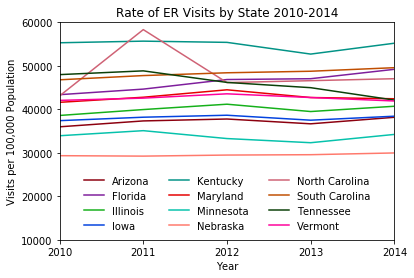

In [7]:
plt.plot(years_list, ER_visits_rate.loc['Arizona',[2010,2011,2012,2013,2014]], color='xkcd:crimson', label = 'Arizona', linestyle = '-')
plt.plot(years_list, ER_visits_rate.loc['Florida',[2010,2011,2012,2013,2014]], color='xkcd:purple', label = 'Florida', linestyle = '-')
plt.plot(years_list, ER_visits_rate.loc['Illinois',[2010,2011,2012,2013,2014]], color='xkcd:green', label = 'Illinois', linestyle = '-')
plt.plot(years_list, ER_visits_rate.loc['Iowa',[2010,2011,2012,2013,2014]], color='xkcd:blue', label = 'Iowa', linestyle = '-')
plt.plot(years_list, ER_visits_rate.loc['Kentucky',[2010,2011,2012,2013,2014]], color='xkcd:teal', label = 'Kentucky', linestyle = '-')
plt.plot(years_list, ER_visits_rate.loc['Maryland',[2010,2011,2012,2013,2014]], color='xkcd:red', label = 'Maryland', linestyle = '-')
plt.plot(years_list, ER_visits_rate.loc['Minnesota',[2010,2011,2012,2013,2014]], color='xkcd:turquoise', label = 'Minnesota', linestyle = '-')
plt.plot(years_list, ER_visits_rate.loc['Nebraska',[2010,2011,2012,2013,2014]], color='xkcd:salmon', label = 'Nebraska', linestyle = '-')
plt.plot(years_list, ER_visits_rate.loc['North Carolina',[2010,2011,2012,2013,2014]], color='xkcd:rose', label = 'North Carolina', linestyle = '-')
plt.plot(years_list, ER_visits_rate.loc['South Carolina',[2010,2011,2012,2013,2014]], color='xkcd:burnt orange', label = 'South Carolina', linestyle = '-')
plt.plot(years_list, ER_visits_rate.loc['Tennessee',[2010,2011,2012,2013,2014]], color='xkcd:hunter green', label = 'Tennessee', linestyle = '-')
plt.plot(years_list, ER_visits_rate.loc['Vermont',[2010,2011,2012,2013,2014]], color='xkcd:neon pink', label = 'Vermont', linestyle = '-')

plt.xlim(2010, 2014)
plt.xticks(np.arange(2010, 2015, 1.0))
plt.legend(frameon=False, loc='lower center', ncol=3)
plt.ylim(10000, 60000)
plt.ylabel("Visits per 100,000 Population")
plt.title("Rate of ER Visits by State 2010-2014")
plt.xlabel("Year")
plt.show()

In [8]:
ER_visits_rate.sort_values(by=[2010], axis=0, ascending=False)

,2010,2011,2012,2013,2014
Kentucky,55309.2,55680.6,55399.2,52705.9,55203.6
Tennessee,47983.7,48847.4,46189.3,44980.4,42125.5
South Carolina,46790.5,47763.5,48406.2,48759.4,49577.6
Florida,43371,44651.6,46851.6,47042.5,49202.2
North Carolina,43091.3,58329.9,46151.9,46589.8,47045.5
Vermont,42056.4,42579.8,43569,42715.7,41918.4
Maryland,41611.8,42781.3,44491.8,42715.7,42434.4
Illinois,38590.4,39949.5,41180.1,39495,40709.2
Iowa,37397.4,38189.3,38644.2,37504,38423.2
Arizona,35981.8,37334.9,37776,36671.1,38171.2


In [9]:
# pull uninsured/insured data and start comparisons to ER visits
uninsured_data = pd.read_csv('Resources/dataframe_uninsured.csv')
insured_data = pd.read_csv('Resources/dataframe_insured.csv')

In [10]:
uninsured_data_copy = uninsured_data.copy()
insured_data_copy = insured_data.copy()

uninsured_data_copy = uninsured_data_copy.set_index('State')
insured_data_copy = insured_data_copy.set_index('State')

del uninsured_data_copy.index.name
del insured_data_copy.index.name

insured_data_copy

,2010,2011,2012,2013,2014
ARIZONA,5245000,5283000,5313000,5403000,5720000
FLORIDA,14593000,14841000,15195000,15392000,16338000
ILLINOIS,10928000,11029000,11076000,11086000,11464000
IOWA,2725000,2748000,2775000,2798000,2874000
KENTUCKY,3596000,3666000,3697000,3696000,3962000
MARYLAND,5047000,5138000,5191000,5241000,5423000
MINNESOTA,4776000,4819000,4895000,4923000,5081000
NEBRASKA,1594000,1607000,1621000,1632000,1674000
NORTH CAROLINA,7791000,7916000,7970000,8136000,8476000
SOUTH CAROLINA,3742000,3813000,3845000,3939000,4092000


In [11]:
uninsured_data_copy

,2010,2011,2012,2013,2014
ARIZONA,1065000,1095000,1131000,1118000,903000
FLORIDA,3941000,3911000,3816000,3853000,3245000
ILLINOIS,1746000,1659000,1622000,1618000,1238000
IOWA,280000,269000,254000,248000,189000
KENTUCKY,647000,618000,595000,616000,366000
MARYLAND,641000,598000,598000,593000,463000
MINNESOTA,476000,467000,425000,440000,317000
NEBRASKA,208000,207000,206000,209000,179000
NORTH CAROLINA,1570000,1545000,1582000,1509000,1276000
SOUTH CAROLINA,795000,766000,778000,739000,642000


In [12]:
insured_rate = pd.DataFrame(insured_data_copy.values / state_pop_copy.values * 100, columns = years_list , index = states_list) 
insured_rate.sort_values(by = 2010, ascending = False)

,2010,2011,2012,2013,2014
Vermont,91.0719,92.3373,92.6384,91.9819,94.3677
Minnesota,89.9295,90.1398,91.0419,90.9397,93.2109
Iowa,89.3224,89.6184,90.209,90.4624,92.4309
Maryland,87.1879,87.9882,88.1775,88.4828,91.0314
Nebraska,87.1256,87.3051,87.4655,87.4936,89.0747
Illinois,85.1057,85.7124,85.977,85.9704,88.9752
Tennessee,84.3546,84.0718,84.8015,84.8123,86.7116
Kentucky,82.7012,83.8936,84.2843,83.9111,89.7528
Arizona,81.8614,81.6204,81.0529,81.4593,84.9874
North Carolina,81.3739,81.9666,81.748,82.6549,85.3327


In [13]:
uninsured_rate = pd.DataFrame(uninsured_data_copy.values / state_pop_copy.values * 100, columns = years_list , index = states_list) 
uninsured_rate.sort_values(by = 2010, ascending = False)

,2010,2011,2012,2013,2014
Florida,20.9121,20.5267,19.7743,19.7129,16.351
South Carolina,17.1497,16.3956,16.4923,15.5119,13.3095
Arizona,16.622,16.9174,17.2541,16.8557,13.4167
North Carolina,16.398,15.9978,16.2265,15.3302,12.8462
Kentucky,14.8798,14.1425,13.5648,13.9852,8.29114
Tennessee,14.1456,14.4235,13.6662,13.658,11.8632
Illinois,13.5976,12.893,12.5907,12.5474,9.60845
Nebraska,11.369,11.2459,11.1153,11.2048,9.52472
Maryland,11.0734,10.2407,10.158,10.0115,7.772
Iowa,9.17809,8.77269,8.25697,8.01811,6.07844


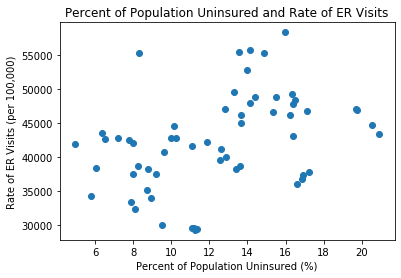

In [14]:
# plot rate of ER visits to percent of population uninsured and calculate regression 

x_values = uninsured_rate[[2010, 2011, 2012, 2013, 2014]]
y_values = ER_visits_rate[[2010, 2011, 2012, 2013, 2014]]

# slope, intercept, rvalue, pvalue, stderr = linregress(x_values.astype(float), y_values.astype(float))

plt.title('Percent of Population Uninsured and Rate of ER Visits')
plt.ylabel('Rate of ER Visits (per 100,000)')
plt.xlabel('Percent of Population Uninsured (%)')
plt.scatter(x_values, y_values)

plt.show()


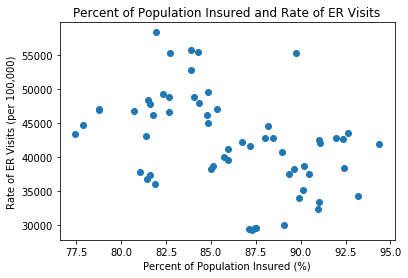

In [15]:
x_values = insured_rate[[2010, 2011, 2012, 2013, 2014]]
y_values = ER_visits_rate[[2010, 2011, 2012, 2013, 2014]]
plt.title('Percent of Population Insured and Rate of ER Visits')
plt.ylabel('Rate of ER Visits (per 100,000)')
plt.xlabel('Percent of Population Insured (%)')
plt.scatter(x_values, y_values)
plt.show()


In [18]:
mortality_rate = pd.read_csv('Resources/crudemortality.csv')
mortality_rate = mortality_rate.set_index('STATE')
mortality_rate

,2010,2011,2012,2013,2014
STATE,,,,,
Arizona,731.6,747.4,755.8,761.6,765.6
Florida,924.4,910.5,916.0,924.0,934.8
Illinois,778.8,792.5,795.7,802.1,817.5
Iowa,910.8,919.6,922.9,936.1,939.5
Kentucky,967.5,975.4,996.1,994.6,1015.9
Maryland,750.4,748.6,754.9,769.3,767.5
Minnesota,734.8,744.6,743.7,755.9,759.5
Nebraska,830.7,840.1,843.9,842.9,849.2
North Carolina,826.1,827.7,840.4,846.1,858.5


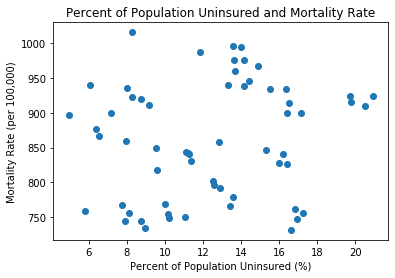

In [22]:
# plot rate of ER visits to percent of population uninsured and calculate regression 

x_values = uninsured_rate[[2010, 2011, 2012, 2013, 2014]]
y_values = mortality_rate[['2010', '2011', '2012', '2013', '2014']]

# slope, intercept, rvalue, pvalue, stderr = linregress(x_values.astype(float), y_values.astype(float))

plt.title('Percent of Population Uninsured and Mortality Rate')
plt.ylabel('Mortality Rate (per 100,000)')
plt.xlabel('Percent of Population Uninsured (%)')
plt.scatter(x_values, y_values)

plt.show()


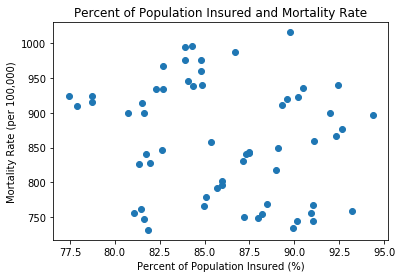

In [21]:
# plot rate of ER visits to percent of population uninsured and calculate regression 

x_values = insured_rate[[2010, 2011, 2012, 2013, 2014]]
y_values = mortality_rate[['2010', '2011', '2012', '2013', '2014']]

# slope, intercept, rvalue, pvalue, stderr = linregress(x_values.astype(float), y_values.astype(float))

plt.title('Percent of Population Insured and Mortality Rate')
plt.ylabel('Mortality Rate (per 100,000)')
plt.xlabel('Percent of Population Insured (%)')
plt.scatter(x_values, y_values)

plt.show()